# Exercise 4: Conditional Edges (The Router Pattern)

In this exercise, we build a "Digital Bouncer" that uses logic to decide the path of the graph.

**Key Concept:** `add_conditional_edges` takes a node, a decision function, and a mapping.

In [1]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [2]:
# 1. Define State
class AgentState(TypedDict):
    age: int
    status: str

In [3]:
# 2. Define Nodes (The Workers)

def check_id_node(state: AgentState) -> AgentState:
    """Reads the state, does checking/logging."""
    print(f"Checking ID for age: {state['age']}")
    return state

def allow_node(state: AgentState) -> AgentState:
    state["status"] = "Welcome to the club!"
    return state

def deny_node(state: AgentState) -> AgentState:
    state["status"] = "Sorry, you are too young."
    return state

In [4]:
# 3. Define the Router Logic (The Decision Helper)
# Note: This is NOT a node. It returns a string, not a State dict.

def route_by_age(state: AgentState) -> Literal["allow", "deny"]:
    if state["age"] >= 21:
        return "allow"
    else:
        return "deny"

In [5]:
# 4. Build the Graph
graph = StateGraph(AgentState)

# Add nodes
graph.add_node("check_id", check_id_node)
graph.add_node("allow", allow_node)
graph.add_node("deny", deny_node)

# Start -> Check ID
graph.add_edge(START, "check_id")

# Conditional Logic: check_id -> [Decision] -> allow OR deny
graph.add_conditional_edges(
    "check_id",       # Where the edge starts
    route_by_age,     # The function that decides
    {
        "allow": "allow",
        "deny": "deny"
    }
)

# End steps
graph.add_edge("allow", END)
graph.add_edge("deny", END)

app = graph.compile()

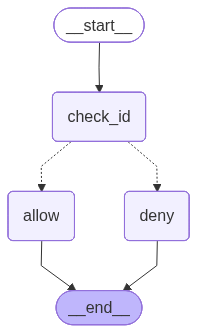

In [6]:
# 5. Visualize
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    print("Graph visualization skipped")

In [ ]:
# Test Case 1: Underage
print("--- Test 1: Age 18 ---")
res1 = app.invoke({"age": 18})
print("Result:", res1["status"])

# Test Case 2: Adult
print("\n--- Test 2: Age 25 ---")
res2 = app.invoke({"age": 25})
print("Result:", res2["status"])